# Problem set 3A
Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Exercise1 Create a robot with contant aceleration

In [2]:
class ConstantAccelerationRobot(object):
    def __init__ (self, init_pos=0., init_vel=0., accel=0., mnoise=0.1):
        self.pos   = init_pos
        self.vel   = init_vel
        self.accel = accel
        self.mnoise = mnoise
        self.pos_history = [self.pos]
        self.vel_history = [self.vel]
        self.m_history = [self.measure_position()]
    
    def measure_position(self):
        return self.pos + np.random.normal(0, self.mnoise) if self.mnoise!=0 else self.pos
        
    def move(self):
        self.pos += self.vel
        self.vel += self.accel
        self.pos_history.append(self.pos)
        self.m_history.append(self.measure_position())
    
    def move_n_time_steps(self, n):
        for t in range(n):
            self.move()

prove the solution

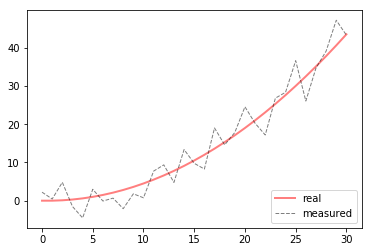

In [7]:
%run -i filter.py
o = ConstantAccelerationRobot(accel=0.1, mnoise=3)
o.move_n_time_steps(n=30)
real, measured = o.pos_history, o.m_history
plot_moves (real, measured)

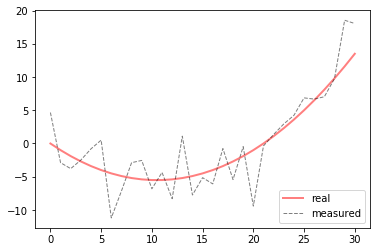

In [8]:
%run -i filter.py
o = ConstantAccelerationRobot(init_vel=-1, accel=0.1, mnoise=3)
o.move_n_time_steps(n=30)
real, measured = o.pos_history, o.m_history
plot_moves (real, measured)

## Exersice 2
Create a kalman filter

In [9]:
def pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R):
    
    # --- FIJATE COMO EL ESTADO AHORA TIENE TRES COMPONENTES ----
    init_x = [np.array([estimated_init_pos]), np.array([estimated_init_vel]), np.array([estimated_init_accel])]

    o = ConstantAccelerationRobot(init_pos=robot_pos, init_vel=robot_vel, accel=robot_accel, mnoise=R)
    o.move_n_time_steps(n=200)
    phist, mhist = o.pos_history, np.array(o.m_history)

    # -----------------
    # TU CODIGO AQUI
    F =  np.array([[1,1,1],[0,1,1],[0,0,1]])
    H =  np.array([[1,0,0],[0,1,0],[0,0,1]])   # Measurement function
    # -----------------
     
    k = KalmanFilter(dim_x=3, dim_z=1, P=P, R=R, Q=Q, F=F, H=H, init_x=init_x)
    xhist, Phist = k.filter_data(mhist)

    xhist = [[i[0][0], i[1][0]] for i in xhist]
    plot_kalman_position_velocity(phist, mhist, xhist, Phist, o.vel_history )

In [10]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 0.
P, R, Q                 = 1., 10., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R)

LinAlgError: singular matrix